In [47]:
# Import Libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjust configuration of plots


# Read in the data

df = pd.read_csv(r'C:\Users\Dan\Documents\Data Analysis Projects\Movie Industry Data - Project\movies.csv')

In [48]:
# To review sample data
df.head()

,name,rating,genre,year,release_date,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,1980-06-13,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,1980-07-02,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980-06-20,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,1980-07-02,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,1980-07-25,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [54]:
# To check for missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print(f'{col} - {pct_missing}%')

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
release_date - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [50]:
# To review data types for columns

df.dtypes

name             object
rating           object
genre            object
year              int64
release_date     object
score           float64
votes           float64
director         object
writer           object
star             object
country          object
budget          float64
gross           float64
company          object
runtime         float64
dtype: object

In [51]:
# To fill in NaN data in int columns
df[["score","votes","budget","gross","runtime"]] = df[["score","votes","budget","gross","runtime"]].fillna(0)

# To fill in NaN values for object columns
df[['company','rating','release_date','writer','star','country']] = df[['company','rating','release_date','writer','star','country']].fillna('UNKNOWN')

In [52]:
# To re-format 'budget' & ; dropping '.0'

df[['budget','gross','votes','runtime']] = df[['budget','gross','votes','runtime']].astype('int64')

In [53]:
df.head()

,name,rating,genre,year,release_date,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,1980-06-13,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,1980-07-02,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980-06-20,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,1980-07-02,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,1980-07-25,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


In [62]:
# To sort data by highest grossing film

df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,release_date,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,2009-12-18,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
7445,Avengers: Endgame,PG-13,Action,2019,2019-04-26,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
3045,Titanic,PG-13,Drama,1997,1997-12-19,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,2015-12-18,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,2018-04-27,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,Mortal Passions,R,Crime,1989,1990-01-26,4.5,274,Andrew Lane,Alan Moskowitz,Zach Galligan,United States,0,0,Gibraltar Entertainment,92
1614,Edge of Sanity,R,Horror,1989,1989-04-14,5.2,1300,Gérard Kikoïne,J.P. Félix,Anthony Perkins,United Kingdom,0,0,Allied Vision,85
1606,"I, Madman",R,Fantasy,1989,1989-04-07,6.0,2900,Tibor Takács,David Chaskin,Jenny Wright,Canada,0,0,Trans World Entertainment (TWE),89
1601,My Twentieth Century,UNKNOWN,Comedy,1989,1990-01-13,7.1,1500,Ildikó Enyedi,Ildikó Enyedi,Dorota Segda,Hungary,0,0,Budapest Stúdió Vállalat,104


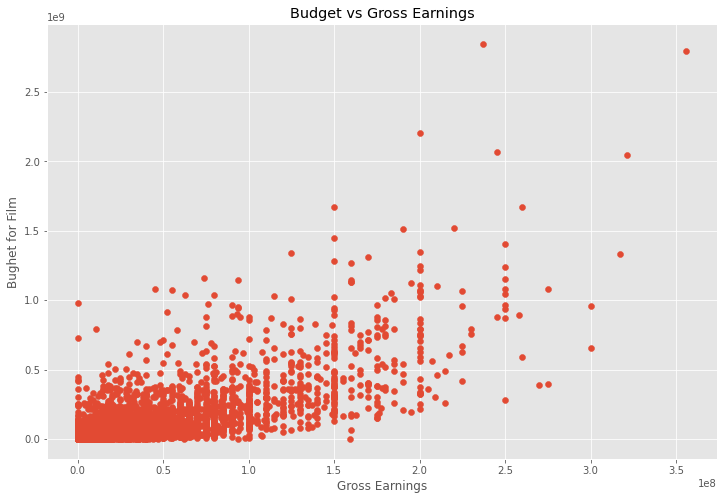

In [65]:
# Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Bughet for Film')

plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

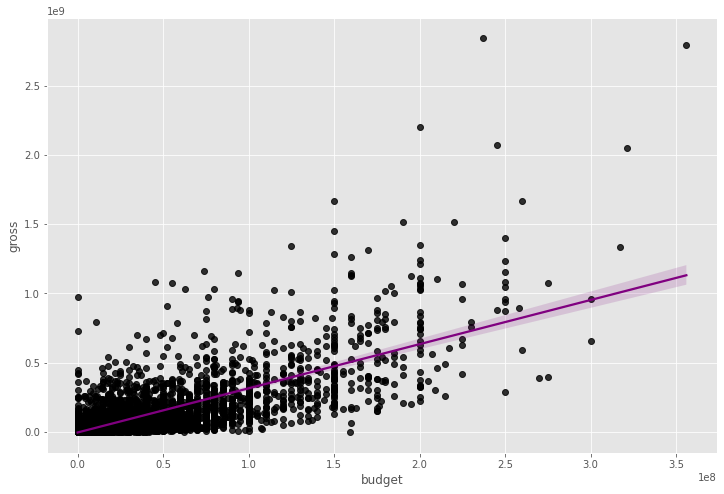

In [69]:
# Regression plot for budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "black"}, line_kws = {"color": "purple"})

In [72]:
# Find correlations
df.corr(method='pearson') 

,year,score,votes,budget,gross,runtime
year,1.000000,0.092616,0.222427,0.309212,0.261900,0.116358
score,0.092616,1.000000,0.407101,0.056863,0.186012,0.394564
votes,0.222427,0.407101,1.000000,0.486931,0.632870,0.306984
budget,0.309212,0.056863,0.486931,1.000000,0.750157,0.268372
gross,0.261900,0.186012,0.632870,0.750157,1.000000,0.244339
runtime,0.116358,0.394564,0.306984,0.268372,0.244339,1.000000


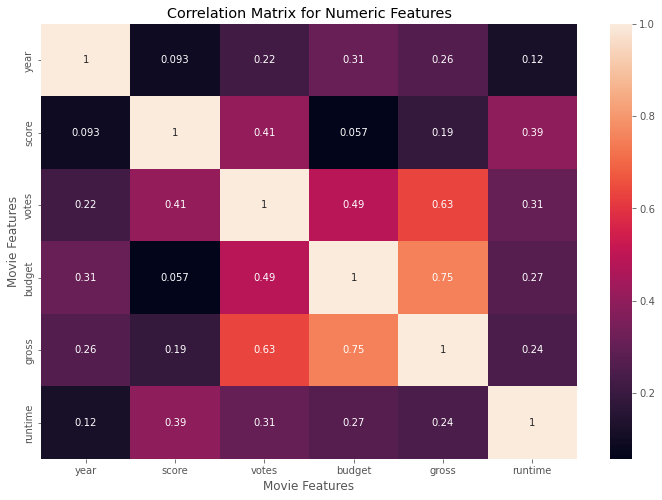

In [74]:
# Visualize correlation matrix 

c_mat = df.corr(method='pearson') 

sns.heatmap(c_mat, annot=True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [75]:
# Company vs Gross analysis

In [76]:
# Create numerical associations for company names

df_numerized = df

for col in df_numerized.columns:
    if (df_numerized[col].dtype == 'object'):
        df_numerized[col] = df_numerized[col].astype('category')
        df_numerized[col] = df_numerized[col].cat.codes
        
df_numerized

,name,rating,genre,year,release_date,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,25,8.4,927000,2589,4014,1047,55,19000000,46998772,2320,146
1,5573,6,1,1980,29,5.8,65000,2269,1632,327,56,4500000,58853106,731,104
2,5142,4,0,1980,26,8.7,1200000,1111,2567,1745,56,18000000,538375067,1540,124
3,286,4,4,1980,29,7.7,221000,1301,2000,2246,56,3500000,83453539,1812,88
4,1027,6,4,1980,33,7.3,108000,1054,521,410,56,6000000,39846344,1777,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,10,6,2020,2943,3.1,18,1500,2289,2421,56,7000,0,2263,90
7664,1678,10,4,2020,2926,4.7,36,774,2614,1886,56,0,0,539,90
7665,4717,10,6,2020,2933,5.7,29,2061,2683,2040,56,58750,0,941,0
7666,2843,10,6,2020,2942,0.0,0,1184,1824,450,56,15000,0,2263,120


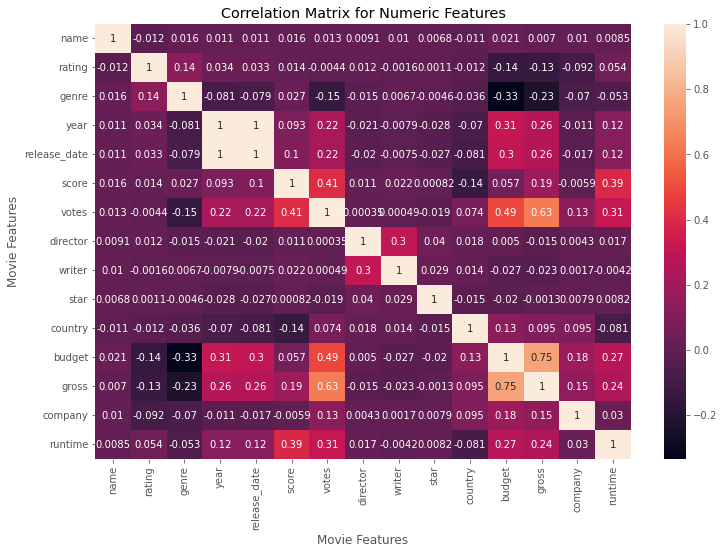

In [77]:
c_mat = df_numerized.corr(method='pearson') 

sns.heatmap(c_mat, annot=True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [78]:
df_numerized.corr()

,name,rating,genre,year,release_date,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.012206,0.016355,0.011453,0.010696,0.016377,0.013038,0.009079,0.009985,0.006844,-0.010573,0.020548,0.006989,0.010362,0.008483
rating,-0.012206,1.000000,0.136127,0.033801,0.032834,0.013917,-0.004429,0.011951,-0.001612,0.001062,-0.011927,-0.141632,-0.131883,-0.092380,0.054119
genre,0.016355,0.136127,1.000000,-0.081261,-0.078592,0.027384,-0.145296,-0.015258,0.006747,-0.004642,-0.036064,-0.334021,-0.234297,-0.070048,-0.052914
year,0.011453,0.033801,-0.081261,1.000000,0.995343,0.092616,0.222427,-0.020795,-0.007931,-0.027911,-0.069945,0.309212,0.261900,-0.011425,0.116358
release_date,0.010696,0.032834,-0.078592,0.995343,1.000000,0.102265,0.218019,-0.020061,-0.007481,-0.027308,-0.080691,0.300668,0.257347,-0.017188,0.122823
score,0.016377,0.013917,0.027384,0.092616,0.102265,1.000000,0.407101,0.010568,0.022475,0.000822,-0.135905,0.056863,0.186012,-0.005867,0.394564
votes,0.013038,-0.004429,-0.145296,0.222427,0.218019,0.407101,1.000000,0.000349,0.000488,-0.019378,0.073585,0.486931,0.632870,0.130579,0.306984
director,0.009079,0.011951,-0.015258,-0.020795,-0.020061,0.010568,0.000349,1.000000,0.299523,0.039874,0.017854,0.004976,-0.014916,0.004253,0.017062
writer,0.009985,-0.001612,0.006747,-0.007931,-0.007481,0.022475,0.000488,0.299523,1.000000,0.028885,0.014292,-0.026777,-0.022963,0.001748,-0.004213
star,0.006844,0.001062,-0.004642,-0.027911,-0.027308,0.000822,-0.019378,0.039874,0.028885,1.000000,-0.015327,-0.020228,-0.001327,0.007948,0.008218


In [81]:
# Unpack and sort correlation values

c_mat2 = df_numerized.corr()

corr_pairs = c_mat2.unstack()

sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget        genre          -0.334021
genre         budget         -0.334021
gross         genre          -0.234297
genre         gross          -0.234297
votes         genre          -0.145296
genre         votes          -0.145296
budget        rating         -0.141632
rating        budget         -0.141632
country       score          -0.135905
score         country        -0.135905
rating        gross          -0.131883
gross         rating         -0.131883
company       rating         -0.092380
rating        company        -0.092380
genre         year           -0.081261
year          genre          -0.081261
country       release_date   -0.080691
release_date  country        -0.080691
country       runtime        -0.080600
runtime       country        -0.080600
release_date  genre          -0.078592
genre         release_date   -0.078592
              company        -0.070048
company       genre          -0.070048
year          country        -0.069945
country       year       

In [95]:
high_corrs = sorted_pairs[(sorted_pairs) > 0.5]

high_corrs

gross         votes           0.632870
votes         gross           0.632870
gross         budget          0.750157
budget        gross           0.750157
year          release_date    0.995343
release_date  year            0.995343
name          name            1.000000
director      director        1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
writer        writer          1.000000
votes         votes           1.000000
score         score           1.000000
release_date  release_date    1.000000
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
company       company         1.000000
runtime       runtime         1.000000
dtype: float64

In [ ]:
# Votes and budget have the highest correlation with gross earnings